In [38]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



In [29]:
df = pd.read_csv("retail_analytics.csv")
print("Original Retail Analytics dataset : \n")
display(df)

Original Retail Analytics dataset : 



,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [30]:
fill_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
for col in fill_cols:
    df[col] = df[col].fillna(df[col].median())

print("Dataset after handling missing values : \n")
display(df)

Dataset after handling missing values : 



,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,4743.58,364.57,36.26,1176.425,2727.135,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,4743.58,364.57,36.26,1176.425,2727.135,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,4743.58,364.57,36.26,1176.425,2727.135,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,4743.58,364.57,36.26,1176.425,2727.135,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.970,3169.690,182.764003,7.806,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.470,1514.930,182.764003,7.806,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.840,2150.360,182.764003,7.806,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.000,1059.460,182.764003,7.806,False


In [31]:
df = df.drop_duplicates()
print("Dataset after removing duplicate tuples : \n")
display(df)

Dataset after removing duplicate tuples : 



,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,4743.58,364.57,36.26,1176.425,2727.135,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,4743.58,364.57,36.26,1176.425,2727.135,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,4743.58,364.57,36.26,1176.425,2727.135,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,4743.58,364.57,36.26,1176.425,2727.135,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.970,3169.690,182.764003,7.806,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.470,1514.930,182.764003,7.806,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.840,2150.360,182.764003,7.806,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.000,1059.460,182.764003,7.806,False


In [32]:
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

for col in ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']:
    df = remove_outliers_iqr(df, col)

print("Dataset after removal of outliers : \n")
display(df)

Dataset after removal of outliers : 



,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,4743.58,364.57,36.26,1176.425,2727.135,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,4743.58,364.57,36.26,1176.425,2727.135,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,4743.58,364.57,36.26,1176.425,2727.135,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,4743.58,364.57,36.26,1176.425,2727.135,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8095,45,07/10/2011,55.82,3.583,4743.58,364.57,36.26,1176.425,2727.135,187.483796,8.523,False
8096,45,14/10/2011,63.82,3.541,4743.58,364.57,36.26,1176.425,2727.135,187.691748,8.523,False
8097,45,21/10/2011,59.60,3.570,4743.58,364.57,36.26,1176.425,2727.135,187.784620,8.523,False
8098,45,28/10/2011,51.78,3.569,4743.58,364.57,36.26,1176.425,2727.135,187.877491,8.523,False


In [51]:
features = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)
scaled1 = sp.Matrix(scaled)

print("'Temperature', 'Fuel_Price', 'CPI' and 'Unemployement' attributes after scaling : \n")
print("        Temperature                Fuel_Price              CPI           Unemployement \n")
display(scaled1)

'Temperature', 'Fuel_Price', 'CPI' and 'Unemployement' attributes after scaling : 

        Temperature                Fuel_Price              CPI           Unemployement 



Matrix([
[   -0.967618381786768,    -1.32722863460806,  0.985669722197332,   0.100165362116638],
[    -1.17047024185069,    -1.38097865334387,   0.98949262838748,   0.100165362116638],
[    -1.09466770466891,    -1.45712451321962,   0.99072417481287,   0.100165362116638],
[   -0.737007846135147,    -1.35186405986197,  0.991523827507165,   0.100165362116638],
[   -0.743947515032071,    -1.20853067656646,  0.992323480201461,   0.100165362116638],
[    -0.14126396236846,    -1.11446814377878,  0.993123132895756,   0.100165362116638],
[   -0.312620402054039,   -0.995770185737187,  0.988796935787067,   0.100165362116638],
[   -0.479706276264589,   -0.968895176369279,  0.983616429066975,   0.100165362116638],
[   0.0978877042332209,   -0.998009769851181,  0.978435924968695,  -0.176051989556174],
[    0.289529329925193,    -0.88379098003757,  0.973255420870415,  -0.176051989556174],
[    0.314085081406615,    -0.79868678370586,  0.969738065907475,  -0.176051989556174],
[     0.23507962011856,

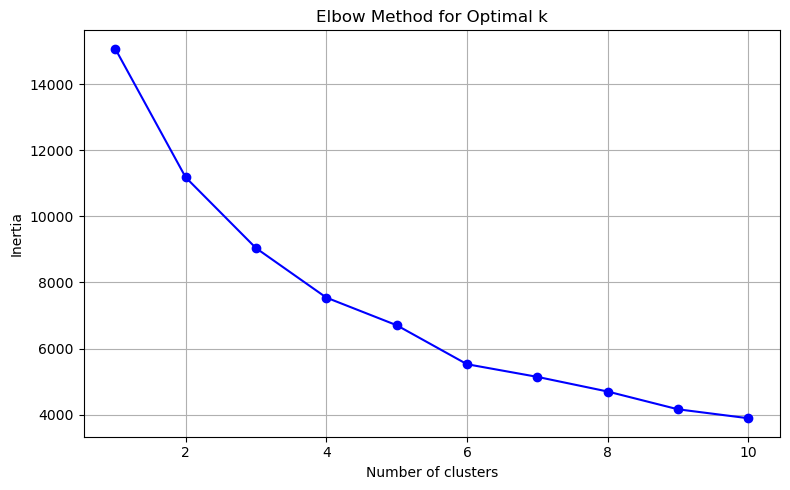

In [34]:
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()

Silhouette Score (sampled): 0.269


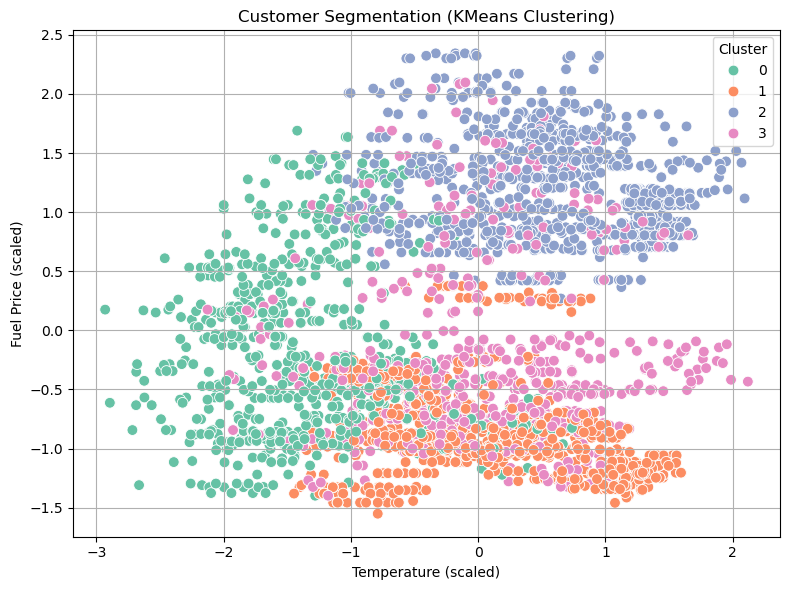

In [35]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)


sample_idx = np.random.choice(len(scaled), size=1000, replace=False)
sampled_score = silhouette_score(scaled[sample_idx], df['Cluster'].iloc[sample_idx])
print(f"Silhouette Score (sampled): {sampled_score:.3f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled[:, 0], y=scaled[:, 1], hue=df['Cluster'], palette='Set2', s=60)
plt.title("Customer Segmentation (KMeans Clustering)")
plt.xlabel("Temperature (scaled)")
plt.ylabel("Fuel Price (scaled)")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()